# Finemapping using susieR

## Data preparation

In [1]:
import gwaslab as gl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sumstats = gl.Sumstats("../06_Association_tests/1kgeas.B1.glm.firth",fmt="plink2")

Mon Jan 16 12:24:25 2023 Start to load format from formatbook....
Mon Jan 16 12:24:25 2023  -plink2 format meta info:
Mon Jan 16 12:24:25 2023   - format_name  : PLINK2 .glm.firth, .glm.logistic,.glm.linear
Mon Jan 16 12:24:25 2023   - format_source  : https://www.cog-genomics.org/plink/2.0/formats
Mon Jan 16 12:24:25 2023   - format_version  : Alpha 3.3 final (3 Jun)
Mon Jan 16 12:24:25 2023   - last_check_date  :  20220806
Mon Jan 16 12:24:25 2023  -plink2 format dictionary:
Mon Jan 16 12:24:25 2023   - plink2 keys: ID,#CHROM,POS,REF,ALT,A1,OBS_CT,A1_FREQ,BETA,LOG(OR)_SE,SE,Z_STAT,P,LOG10_P,MACH_R2,OR,L95,U95
Mon Jan 16 12:24:25 2023   - gwaslab values: SNPID,CHR,POS,REF,ALT,EA,N,EAF,BETA,SE,SE,Z,P,MLOG10P,INFO,OR,OR_95L,OR_95U
Mon Jan 16 12:24:25 2023 Start to initiate from file :../06_Association_tests/1kgeas.B1.glm.firth
Mon Jan 16 12:24:27 2023  -Reading columns          : REF,ID,POS,#CHROM,A1,P,LOG(OR)_SE,OR,ALT,Z_STAT,OBS_CT
Mon Jan 16 12:24:27 2023  -Renaming columns to      :

In [3]:
sumstats.basic_check()

Mon Jan 16 12:24:29 2023 Start to check IDs...
Mon Jan 16 12:24:29 2023  -Current Dataframe shape : 1122299  x  11
Mon Jan 16 12:24:29 2023  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Mon Jan 16 12:24:31 2023 Finished checking IDs successfully!
Mon Jan 16 12:24:31 2023 Start to fix chromosome notation...
Mon Jan 16 12:24:31 2023  -Current Dataframe shape : 1122299  x  11
Mon Jan 16 12:24:35 2023  -Vairants with standardized chromosome notation: 1122299
Mon Jan 16 12:24:38 2023  -All CHR are already fixed...
Mon Jan 16 12:24:40 2023 Finished fixing chromosome notation successfully!
Mon Jan 16 12:24:40 2023 Start to fix basepair positions...
Mon Jan 16 12:24:40 2023  -Current Dataframe shape : 1122299  x  11
Mon Jan 16 12:24:40 2023  -Converting to Int64 data type ...
Mon Jan 16 12:24:42 2023  -Position upper_bound is: 250,000,000
Mon Jan 16 12:24:45 2023  -Remove outliers: 0
Mon Jan 16 12:24:46 2023  -Converted all position to datatype Int64.
Mon Jan 16 12:24:46 2023 

In [4]:
sumstats.get_lead()

Mon Jan 16 12:24:51 2023 Start to extract lead variants...
Mon Jan 16 12:24:51 2023  -Processing 1122285 variants...
Mon Jan 16 12:24:51 2023  -Significance threshold : 5e-08
Mon Jan 16 12:24:51 2023  -Sliding window size: 500  kb
Mon Jan 16 12:24:52 2023  -Found 59 significant variants in total...
Mon Jan 16 12:24:52 2023  -Identified 3 lead variants!
Mon Jan 16 12:24:52 2023 Finished extracting lead variants successfully!


,SNPID,CHR,POS,EA,NEA,SE,Z,P,OR,N,STATUS
110723,2:55574452:G:C,2,55574452,C,G,0.160813,-5.97102,2.357800e-09,0.382809,503,9960099
424615,6:29919659:T:C,6,29919659,T,C,0.155341,-5.88600,3.956520e-09,0.400783,503,9960099
635128,9:36660672:A:G,9,36660672,G,A,0.160260,5.63617,1.738760e-08,2.467620,503,9960099


Mon Jan 16 12:24:52 2023 Start to plot manhattan/qq plot with the following basic settings:
Mon Jan 16 12:24:52 2023  -Genome-wide significance level is set to 5e-08 ...
Mon Jan 16 12:24:52 2023  -Raw input contains 1122285 variants...
Mon Jan 16 12:24:52 2023  -Plot layout mode is : mqq
Mon Jan 16 12:24:52 2023 Finished loading specified columns from the sumstats.
Mon Jan 16 12:24:52 2023 Start conversion and sanity check:
Mon Jan 16 12:24:52 2023  -Removed 0 variants with nan in CHR or POS column ...
Mon Jan 16 12:24:53 2023  -Removed 0 variants with nan in P column ...
Mon Jan 16 12:24:53 2023  -P values are being converted to -log10(P)...
Mon Jan 16 12:24:53 2023  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Mon Jan 16 12:24:53 2023  -Sanity check: 0 na/inf/-inf variants will be removed...
Mon Jan 16 12:24:53 2023  -Maximum -log10(P) values is 8.627493036637102 .
Mon Jan 16 12:24:53 2023 Finished data conversion and sanity check.
Mon J

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.Log.Log at 0x7fcc2f677310>)

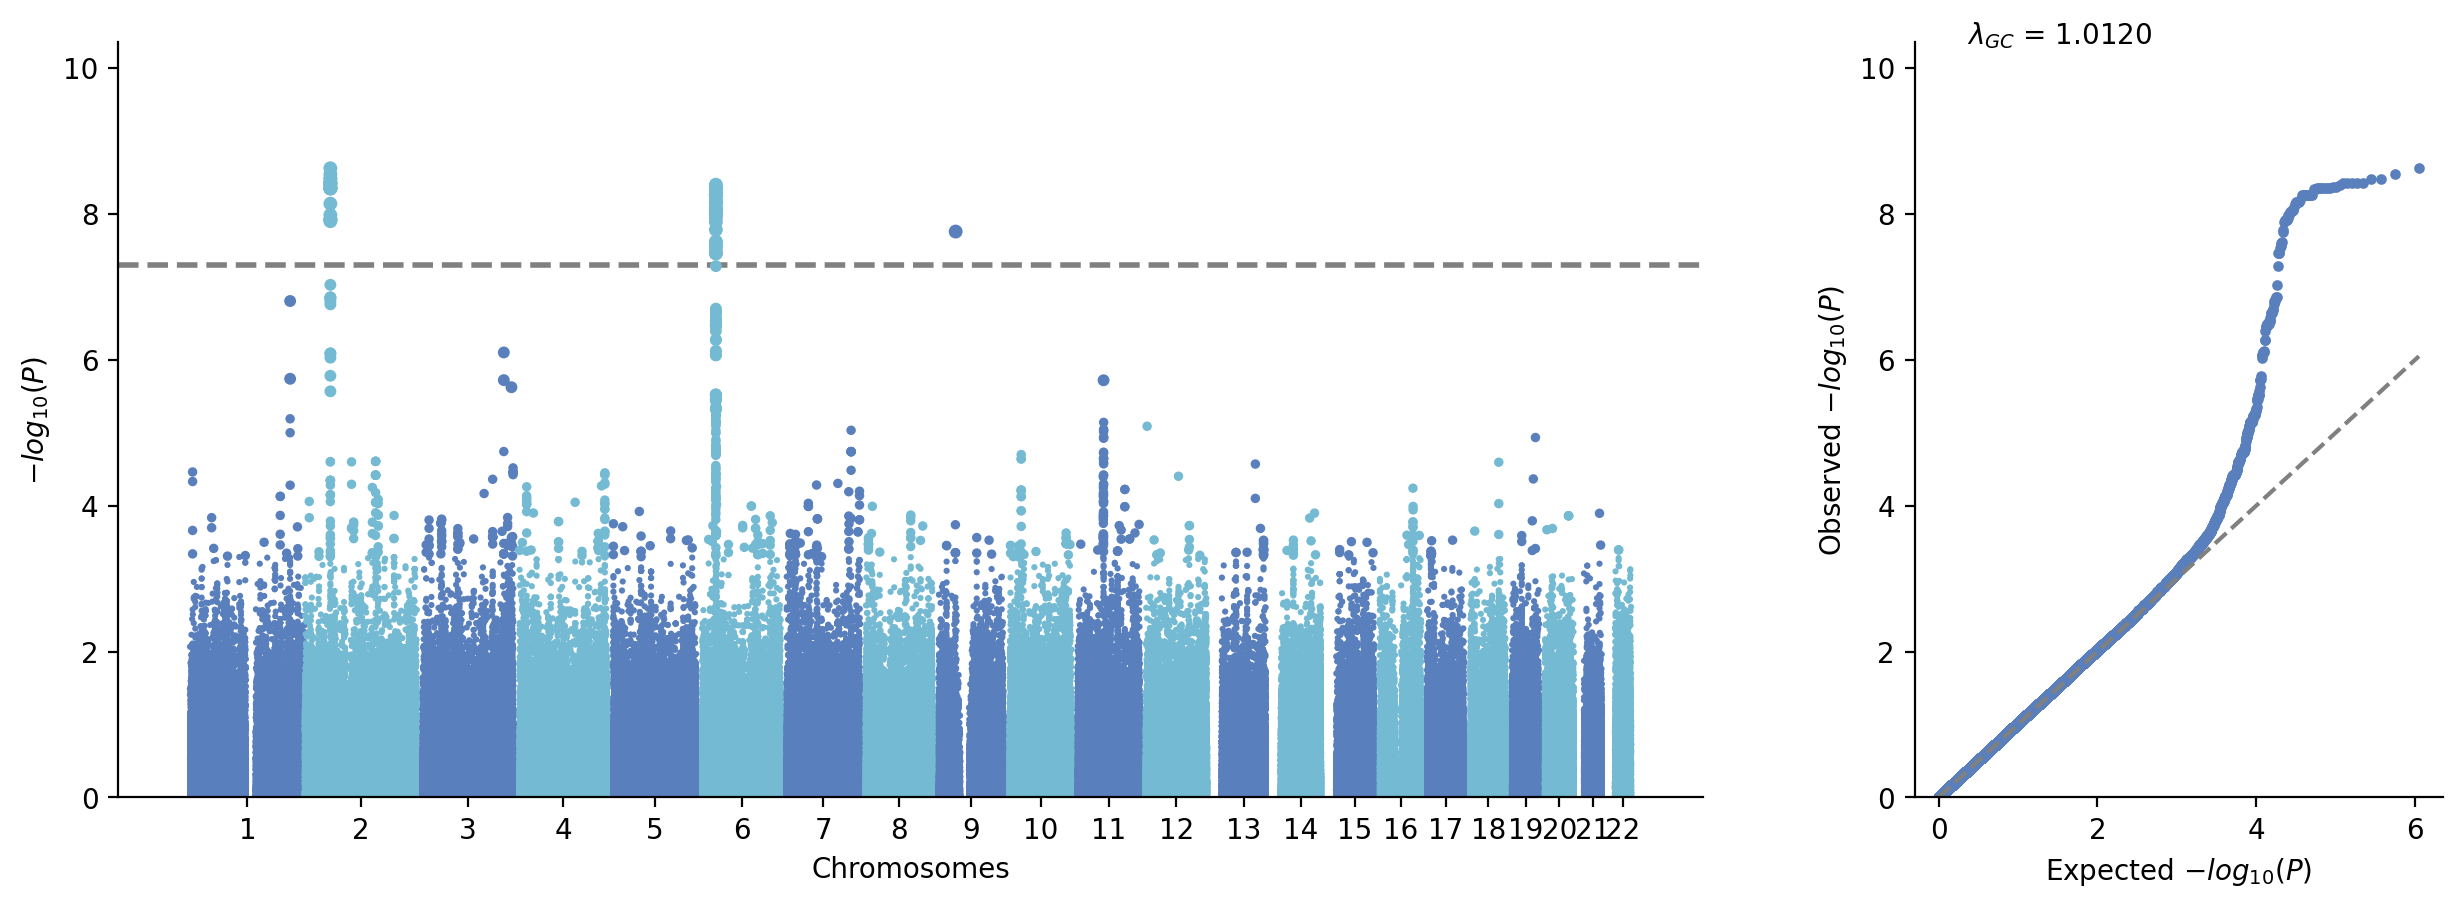

In [5]:
sumstats.plot_mqq()

In [6]:
locus = sumstats.filter_value('CHR==2 & POS>55074452 & POS<56074452')

Mon Jan 16 12:25:18 2023 Start filtering values by condition: CHR==2 & POS>55074452 & POS<56074452
Mon Jan 16 12:25:18 2023  -Removing 1121871 variants not meeting the conditions: CHR==2 & POS>55074452 & POS<56074452
Mon Jan 16 12:25:18 2023 Finished filtering values.


In [7]:
locus.fill_data(to_fill=["BETA"])

Mon Jan 16 12:25:18 2023 Start filling data using existing columns...
Mon Jan 16 12:25:18 2023  -Raw input columns:  ['SNPID', 'CHR', 'POS', 'EA', 'NEA', 'SE', 'Z', 'P', 'OR', 'N', 'STATUS']
Mon Jan 16 12:25:18 2023  -Overwrite mode:  False
Mon Jan 16 12:25:18 2023   -Skipping columns:  []
Mon Jan 16 12:25:18 2023  -Filling columns:  ['BETA']
Mon Jan 16 12:25:18 2023   - Filling BETA value using OR column...
Mon Jan 16 12:25:18 2023 Start to reorder the columns...
Mon Jan 16 12:25:18 2023  -Current Dataframe shape : 414  x  12
Mon Jan 16 12:25:18 2023  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,BETA,SE,Z,P,OR,N,STATUS
Mon Jan 16 12:25:18 2023 Finished sorting columns successfully!
Mon Jan 16 12:25:18 2023 Finished filling data using existing columns.


In [8]:
locus.data

,SNPID,CHR,POS,EA,NEA,BETA,SE,Z,P,OR,N,STATUS
110525,2:55079388:C:T,2,55079388,T,C,0.199523,0.136600,1.460650,0.144112,1.220820,503,9960099
110526,2:55079654:A:T,2,55079654,A,T,0.126765,0.134100,0.945302,0.344505,1.135150,503,9960099
110527,2:55080703:A:C,2,55080703,C,A,0.073548,0.146541,0.501892,0.615744,1.076320,503,9960099
110528,2:55086992:G:A,2,55086992,A,G,-0.216742,0.310447,-0.698158,0.485078,0.805138,503,9960099
110529,2:55087887:C:T,2,55087887,T,C,-0.059573,0.156956,-0.379552,0.704278,0.942167,503,9960099
...,...,...,...,...,...,...,...,...,...,...,...,...
110934,2:56046438:G:A,2,56046438,G,A,0.312831,0.211863,1.476560,0.139794,1.367290,503,9960099
110935,2:56047038:G:A,2,56047038,G,A,0.209061,0.171011,1.222500,0.221519,1.232520,503,9960099
110936,2:56048107:G:C,2,56048107,G,C,0.240677,0.169593,1.419120,0.155864,1.272110,503,9960099
110937,2:56074410:C:A,2,56074410,C,A,0.238922,0.203308,1.175160,0.239932,1.269880,503,9960099


In [43]:
locus.harmonize(basic_check=False, ref_seq="/Users/he/mydata/Reference/Genome/human_g1k_v37.fasta")

Mon Jan 16 12:41:05 2023 Start to check if NEA is aligned with reference sequence...
Mon Jan 16 12:41:05 2023  -Current Dataframe shape : 414  x  12
Mon Jan 16 12:41:05 2023  -Reference genome fasta file: /Users/he/mydata/Reference/Genome/human_g1k_v37.fasta
Mon Jan 16 12:41:05 2023  -Checking records: 1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  X  Y  MT  
Mon Jan 16 12:41:36 2023  -Variants allele on given reference sequence :  237
Mon Jan 16 12:41:36 2023  -Variants flipped :  177
Mon Jan 16 12:41:36 2023   -Raw Matching rate :  100.00%
Mon Jan 16 12:41:36 2023  -Variants inferred reverse_complement :  0
Mon Jan 16 12:41:36 2023  -Variants inferred reverse_complement_flipped :  0
Mon Jan 16 12:41:36 2023  -Both allele on genome + unable to distinguish :  0
Mon Jan 16 12:41:36 2023  -Variants not on given reference sequence :  0
Mon Jan 16 12:41:37 2023  -Current Dataframe shape : 414  x  12
Mon Jan 16 12:41:37 2023 Start to flip allele-specific stat

In [44]:
locus.data.to_csv("sig_locus.tsv",sep="\t",index=None)
locus.data["SNPID"].to_csv("sig_locus.snplist",sep="\t",index=None,header=None)

## Finemapping 

In [10]:
import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri as numpy2ri
numpy2ri.activate()

INFO:rpy2.situation:cffi mode is CFFI_MODE.ANY
INFO:rpy2.situation:R home found: /Library/Frameworks/R.framework/Resources
INFO:rpy2.situation:R library path: 
INFO:rpy2.situation:LD_LIBRARY_PATH: 
INFO:rpy2.situation:R exec path: /Library/Frameworks/R.framework/Resources/bin/R
INFO:rpy2.rinterface_lib.embedded:Default options to initialize R: rpy2, --quiet, --no-save
INFO:rpy2.rinterface_lib.embedded:R is already initialized. No need to initialize.


In [45]:
df = pd.read_csv("sig_locus.tsv",sep="\t")
df 

,SNPID,CHR,POS,EA,NEA,BETA,SE,Z,P,OR,N,STATUS
0,2:55079388:C:T,2,55079388,T,C,0.199523,0.136600,1.460650,0.144112,1.220820,503,9960009
1,2:55079654:A:T,2,55079654,T,A,-0.126765,0.134100,0.945302,0.344505,0.880941,503,9960019
2,2:55080703:A:C,2,55080703,C,A,0.073548,0.146541,0.501892,0.615744,1.076320,503,9960009
3,2:55086992:G:A,2,55086992,A,G,-0.216742,0.310447,-0.698158,0.485078,0.805138,503,9960009
4,2:55087887:C:T,2,55087887,T,C,-0.059573,0.156956,-0.379552,0.704278,0.942167,503,9960009
...,...,...,...,...,...,...,...,...,...,...,...,...
409,2:56046438:G:A,2,56046438,A,G,-0.312831,0.211863,1.476560,0.139794,0.731374,503,9960019
410,2:56047038:G:A,2,56047038,A,G,-0.209061,0.171011,1.222500,0.221519,0.811346,503,9960019
411,2:56048107:G:C,2,56048107,C,G,-0.240677,0.169593,1.419120,0.155864,0.786096,503,9960019
412,2:56074410:C:A,2,56074410,A,C,-0.238922,0.203308,1.175160,0.239932,0.787476,503,9960019


In [46]:
# import susieR as object
susieR = importr('susieR')

In [47]:
# convert pd.DataFrame to numpy
ld = pd.read_csv("sig_locus_mt.ld",sep="\t",header=None)
R_df = ld.values
#ld2 = pd.read_csv("sig_locus_mt_r2.ld",sep="\t",header=None)
#R_df2 = ld2.values

In [48]:
R_df

array([[ 1.        , -0.766746  ,  0.850204  , ...,  0.016145  ,
        -0.0543754 , -0.0664124 ],
       [-0.766746  ,  1.        , -0.646211  , ..., -0.00602064,
         0.0680547 ,  0.0639558 ],
       [ 0.850204  , -0.646211  ,  1.        , ...,  0.034304  ,
        -0.0402253 , -0.0526333 ],
       ...,
       [ 0.016145  , -0.00602064,  0.034304  , ...,  1.        ,
         0.536946  ,  0.586261  ],
       [-0.0543754 ,  0.0680547 , -0.0402253 , ...,  0.536946  ,
         1.        ,  0.91945   ],
       [-0.0664124 ,  0.0639558 , -0.0526333 , ...,  0.586261  ,
         0.91945   ,  1.        ]])

NameError: name 'R_df2' is not defined

<Figure size 2000x2000 with 0 Axes>

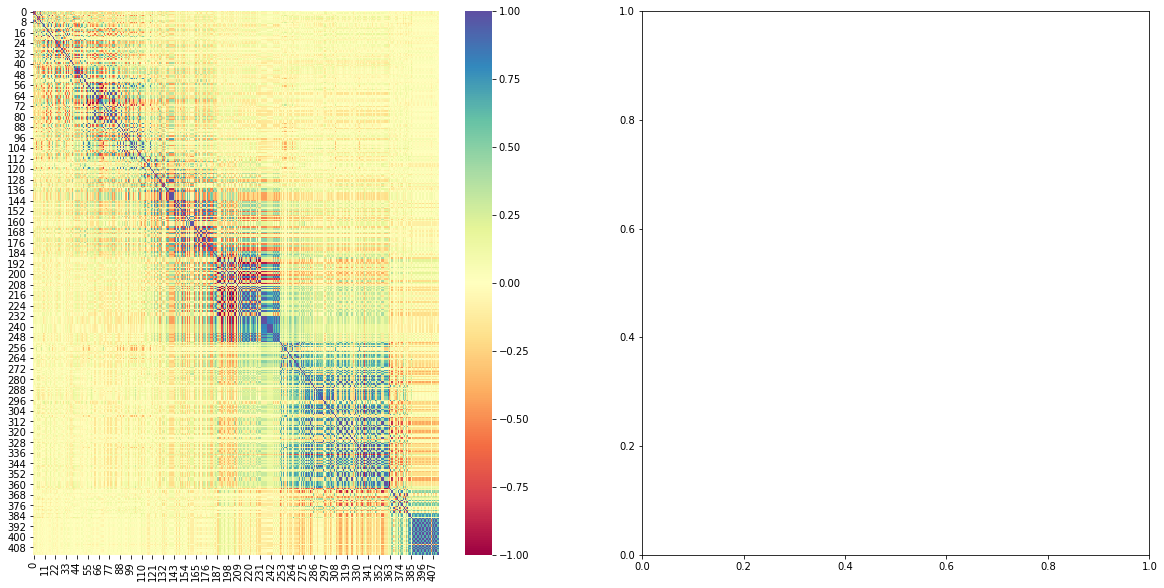

In [49]:
plt.figure(figsize=(10,10),dpi=200)
fig, ax = plt.subplots(ncols=2,figsize=(20,10))
sns.heatmap(data=R_df,cmap="Spectral",ax=ax[0])
sns.heatmap(data=R_df2,ax=ax[1])
ax[0].set_title("LD r matrix")
ax[1].set_title("LD r2 matrix")

https://stephenslab.github.io/susieR/articles/finemapping_summary_statistics.html#fine-mapping-with-susier-using-summary-statistics

In [52]:
ro.r('set.seed(2932)')
fit = susieR.susie_rss(
    bhat = df["BETA"].values.reshape((len(R_df),1)),
    shat = df["SE"].values.reshape((len(R_df),1)),
    R = R_df,
    L = 10,
    n = 503
)

In [53]:
fit

<rpy2.robjects.vectors.ListVector object at 0x7fcb86353540> [RTYPES.VECSXP]
R classes: ('susie',)
[FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp..., ..., FloatSexp..., FloatSexp..., ListSexpV..., FloatSexp...]
  alpha: <class 'numpy.ndarray'>
  array([[2.09031576e-08, 1.14917130e-08, 8.42180573e-09, ...,
        1.97346018e-08, 1.45441089e-08, 3.53510267e-08],
       [2.41545894e-03, 2.41545894e-03, 2.41545894e-03, ...,
        2.41545894e-03, 2.41545894e-03, 2.41545894e-03],
       [2.41545894e-03, 2.41545894e-03, 2.41545894e-03, ...,
        2.41545894e-03, 2.41545894e-03, 2.41545894e-03],
       ...,
       [2.41545894e-03, 2.41545894e-03, 2.41545894e-03, ...,
        2.41545894e-03, 2.41545894e-03, 2.41545894e-03],
       [2.41545894e-03, 2.41545894e-03, 2.41545894e-03, ...,
        2.41545894e-03, 2.41545894e-03, 2.41545894e-03],
       [2.41545894e-03, 2.41545894e-03, 2.41545894e-03, ...,
        2.41545894e-03, 2.41545894e-03, 2.41545894e-03]])
  mu: <class 'numpy.ndarray'>
  array([[ 0.06309725, -0.04088597,  0.02172167, ..., -0.06131219,
        -0.05080381, -0.07752188],
       [ 0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [ 0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ]])
  mu2: <class 'numpy.ndarray'>
  array([[0.00591148, 0.00360188, 0.00240205, ..., 0.0056894 , 0.00451125,
        0.00793986],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])
  KL: <class 'numpy.ndarray'>
  array([ 4.66103413, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])
...
  lbf_variable: <class 'numpy.ndarray'>
  array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

In [54]:
df["MLOG10P"] = -np.log10(df["P"])

In [55]:
df["cs"] = 0
n_cs=len(susieR.susie_get_cs(fit, coverage = 0.95,min_abs_corr = 0.5,Xcorr = R_df)[0])
for i in range(n_cs):
    cs_index = susieR.susie_get_cs(fit,coverage = 0.95,min_abs_corr = 0.5,Xcorr = R_df)[0][i]
    df.loc[cs_index-1,"cs"] = i + 1
df["pip"] = np.array(susieR.susie_get_pip(fit))

<ipython-input-57-bf979817ccab>:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[0].scatter(df.loc[(df["CHR"]==2)&(df["POS"]==55620927),"POS"],df.loc[(df["CHR"]==2)&(df["POS"]==55620927),col_to_plot],


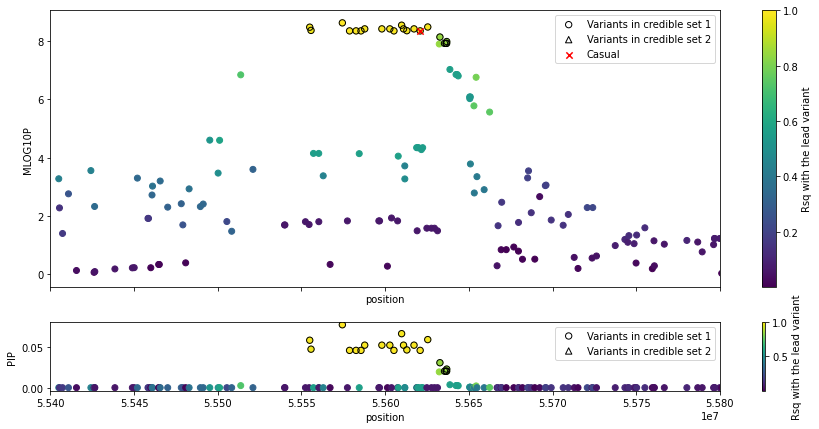

In [57]:
fig ,axes = plt.subplots(nrows=2,sharex=True,figsize=(15,7),height_ratios=(4,1))

col_to_plot = "MLOG10P"
p=axes[0].scatter(df["POS"],df[col_to_plot],c=ld[df["P"].idxmin()]**2)

axes[0].scatter(df.loc[df["cs"]==1,"POS"],df.loc[df["cs"]==1,col_to_plot],
           marker='o',s=40,c="None",edgecolors='black',label="Variants in credible set 1")
axes[0].scatter(df.loc[df["cs"]==2,"POS"],df.loc[df["cs"]==2,col_to_plot],
           marker='^',s=40,c="None",edgecolors='black',label="Variants in credible set 2")

axes[0].scatter(df.loc[(df["CHR"]==2)&(df["POS"]==55620927),"POS"],df.loc[(df["CHR"]==2)&(df["POS"]==55620927),col_to_plot],
           marker='x',s=40,c="red",edgecolors='black',label="Casual")

plt.colorbar( p , label="Rsq with the lead variant")
axes[0].set_xlabel("position")
axes[0].set_xlim((55400000, 55800000))
axes[0].set_ylabel(col_to_plot)
axes[0].legend()

p=axes[1].scatter(df["POS"],df["pip"],c=ld[df["P"].idxmin()]**2)

axes[1].scatter(df.loc[df["cs"]==1,"POS"],df.loc[df["cs"]==1,"pip"],
           marker='o',s=40,c="None",edgecolors='black',label="Variants in credible set 1")
axes[1].scatter(df.loc[df["cs"]==2,"POS"],df.loc[df["cs"]==2,"pip"],
           marker='^',s=40,c="None",edgecolors='black',label="Variants in credible set 2")
plt.colorbar( p , label="Rsq with the lead variant")
axes[1].set_xlabel("position")
axes[1].set_xlim((55400000, 55800000))
axes[1].set_ylabel("PIP")
axes[1].legend()

